In [1]:
import numpy as np
import matplotlib.pyplot as plt 

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

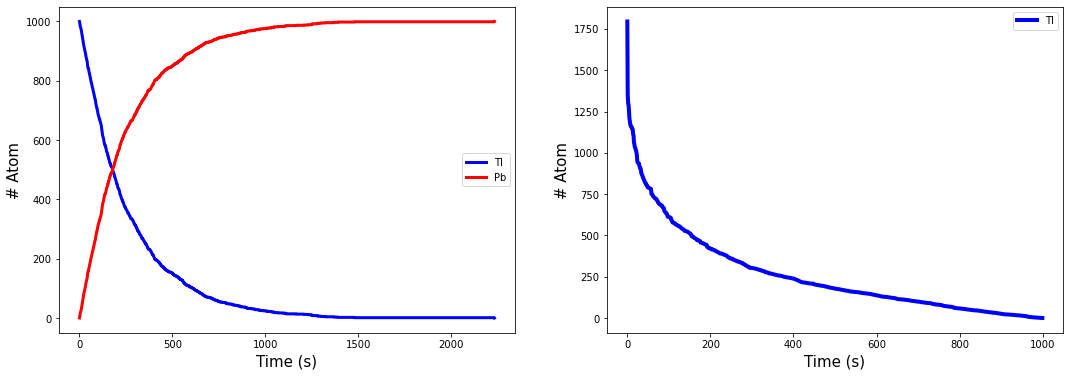

In [2]:
tau = 3.052 * 60
Tl = 1000
Tl_history = []
n = 1000

def p(tau):
    return 1 - 2**(-1 / tau)

Tl_history.append(Tl)
for i in range(9999):
    if Tl_history[i] == 0:
        break
    
    rand = np.random.uniform(size = Tl_history[i])
    decay = sum(rand < p(tau))
    Tl_history.append(Tl_history[i] - decay)
Pb = n - np.array(Tl_history)

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(18, 6))
ax1.plot(Tl_history, color = "blue", label = "Tl", linewidth = 3)
ax1.plot(Pb, color = "red", label = "Pb", linewidth = 3)
ax1.set_xlabel('Time (s)', size = 15)
ax1.set_ylabel('# Atom', size = 15)
ax1.legend()

def icdf(y):                              
    return -np.log(1 - y) / (np.log(2) / tau)

y = np.random.random(n)
decays = icdf(y)
decays_refined = np.sort(decays)[::-1]
ax2.set_xlabel('Time (s)', size = 15)
ax2.set_ylabel('# Atom', size = 15)
ax2.plot(decays_refined, color = "blue", linewidth = 4, label = "Tl")
ax2.legend()


2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

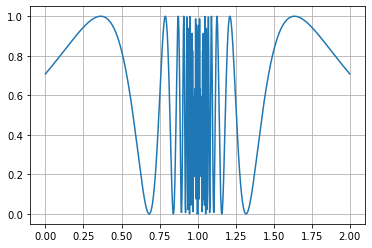

In [3]:
def f(x):
    return np.sin(1 / (1-x))**2

N = 1000
x = np.linspace(0.0001, 1.9999, N)

plt.plot(x, f(x))
plt.grid()
plt.show()

In [4]:
n = 100000
I_repeat = 50
I_list = []

# run it 50 times and calculate mean-std
for i in range(I_repeat):
    count = 0
    for j in range(n):
        x = 2 * np.random.random()
        y = np.random.random()
        if y < f(x): count += 1
            
    I_list.append(2 * count / n)

print("--Hit or Miss - 50 repeat--")
print("Integral mean :", np.mean(I_list))
print("Integral std :",np.std(I_list) / np.sqrt(I_repeat))
print("Distance from true value :", np.abs(1.34691 - np.mean(I_list)))

x = 2 * np.random.random(n)
mvm_I = 2 * np.sum(f(x)) / n
print("\n--Mean Value Integral--")
print("Integral :", np.mean(mvm_I))
print("Distance from true value :", np.abs(1.34691 - mvm_I))

--Hit or Miss - 50 repeat--
Integral mean : 1.3464256000000001
Integral std : 0.00037855178351184414
Distance from true value : 0.00048439999999994043

--Mean Value Integral--
Integral : 1.3496970155294097
Distance from true value : 0.002787015529409631


3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [5]:
n = 100000

# 2D
count = 0   
for i in range(n):
    x = 2 * np.random.random() - 1 #-1 to 1
    y = 2 * np.random.random() - 1    
    if(x**2 + y**2 <= 1): count += 1
        
I = 4 * count / n # 4 -> area of the box
print("Integral 2D :", I)       
print("The error :", np.abs(np.pi - I))   

# 10D  
count = 0   
for i in range(n):
    x = 2 * np.random.rand(10) - 1
    r = (x**2).sum()
    
    if(r <= 1): count += 1
        
I10 = (2**10) * count / n # 2**10 -> V
print("Integral 10D :", I10)
print("The error :", np.abs((np.pi**5)/120 - I10))   


Integral 2D : 3.12848
The error : 0.013112653589792966
Integral 10D : 2.47808
The error : 0.07208403987734524


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [6]:
n = 100000

def w(x):
    return x**(-1 / 2)

def f(x):
    return x**(-1 / 2) / (np.exp(x) + 1)  

x = np.random.random(n) ** 2  

I_repeat = 50
I_list = []

# run it 50 times and calculate mean
for i in range(I_repeat):
    I = 1 / n * np.sum(f(x) / w(x)) * 2
    I_list.append(I)
            
print("Mean I after 50 repeat :", np.mean(I_list))


Mean I after 50 repeat : 0.8384312147896015
